In [1]:
#The Dataset used is for Cardiovascular Disease Predition and the data is sourced from Kaggle
#https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
# The Target Colum is : Heart_Disease
# The Feature Columns are as follows:
# general_health,checkup,exercise,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height_(cm),weight_(kg),bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption,

In [2]:
#Python Packages for the solution
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#The other Packages which are required in the solution, for ease all the imports are at the beginning of the code
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


In [4]:
#The following function is used to convert the Column Names to lowercase and replace any spaces in the column name with an underscore
def lowercase_cols(df):
    df.columns = df.columns.str.lower().str.replace(' ','_')
    return df.columns

In [5]:
#The following function is to Encode the Column Data. Here we are using Label Encoder
#Input Parameters   :
#   Parameter 1     : DataFrame where the values are to be Encoded
#   Parameter 2     : List of columns to be Encoded
#Return Value       : DataFrame post encoding

def encode(data,columns):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for colname in columns:
        data[colname] = le.fit_transform(data[colname])
    return data

In [6]:
def skim_data(data):
    for colname in data.columns:
        print("*" * 70)
        print("\nSkimming for {}".format(colname))
        print("\tNumber of Null Values found : {}".format(data[colname].isna().sum()))
        print("\tNumber of Unique values found : {}".format(data[colname].nunique()))
        print("\tThe different values found are as follows:")
        print(data[colname].value_counts())
        print("*" * 70)

    print("\nNull Values found in the following columns")
    for colname in data.columns:
        if (data[colname].isna().sum() > 0 ):
            print(colname)

In [7]:
#The input file is stored locally as CVD.csv, here we are loading the data into Pandas DataFrame and creating a copy for future reference.
df = pd.read_csv('./CVD.csv')

#Backup saved as backup_df
backup_df = df.copy()

In [8]:
#Sample few rows of the dataset
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [9]:
#Change the column names to lower case
df.columns = lowercase_cols(df)

In [10]:
#Here we are giving a glance to the data
skim_data(df)

**********************************************************************

Skimming for general_health
	Number of Null Values found : 0
	Number of Unique values found : 5
	The different values found are as follows:
general_health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64
**********************************************************************
**********************************************************************

Skimming for checkup
	Number of Null Values found : 0
	Number of Unique values found : 5
	The different values found are as follows:
checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64
**********************************************************************
**********************************************************************

Skimming for exercise
	N

In [11]:
#From the following we can confirm that we do not have any missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   general_health                308854 non-null  object 
 1   checkup                       308854 non-null  object 
 2   exercise                      308854 non-null  object 
 3   heart_disease                 308854 non-null  object 
 4   skin_cancer                   308854 non-null  object 
 5   other_cancer                  308854 non-null  object 
 6   depression                    308854 non-null  object 
 7   diabetes                      308854 non-null  object 
 8   arthritis                     308854 non-null  object 
 9   sex                           308854 non-null  object 
 10  age_category                  308854 non-null  object 
 11  height_(cm)                   308854 non-null  float64
 12  weight_(kg)                   308854 non-nul

In [12]:
#From the data which we have skimmed we can infer the following columns can be Encoded.
#We will use our function to encode the list of columns in the input data.
df = encode(df,['heart_disease','exercise','skin_cancer','depression','diabetes','arthritis','sex','smoking_history','other_cancer','general_health','checkup'])

In [13]:
#DataFrame post dropping the columns
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height_(cm),weight_(kg),bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption
0,3,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [14]:
#Exploring "age_category" column for further analysis
df['age_category'].value_counts()

age_category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: count, dtype: int64

In [15]:
#Since the "age_category" looks to be grouped, wee can encode this column using LabelEncoder
df = encode(df,['age_category'])

In [16]:
#DataFrame post processing
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height_(cm),weight_(kg),bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


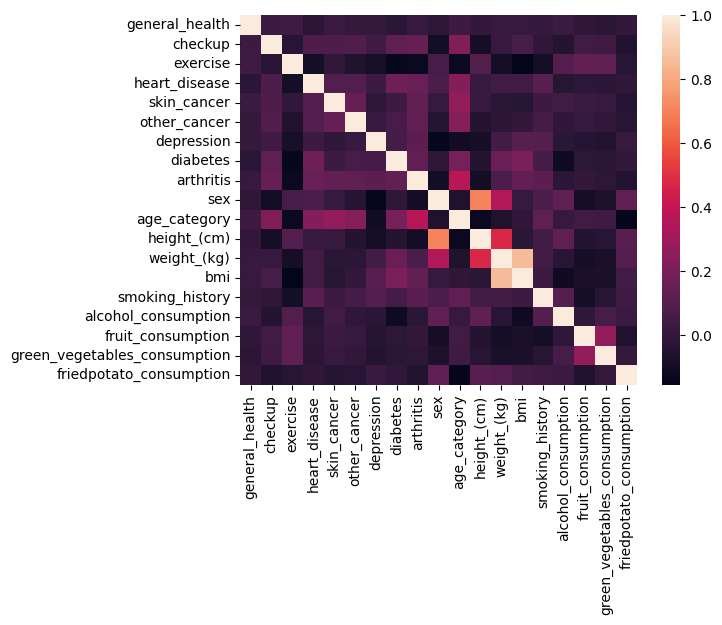

In [17]:
#We will check the corelation of the data as of now using heatmap
sns.heatmap(df.corr())
plt.show()

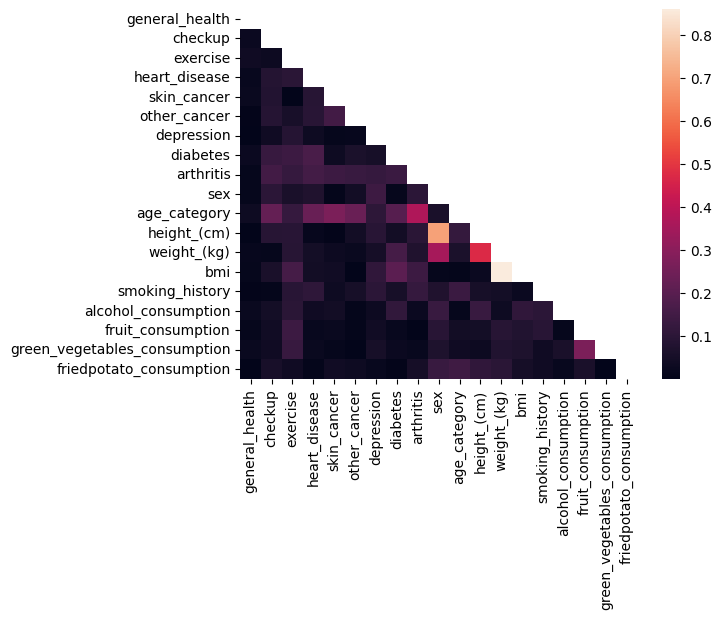

In [18]:
#We will explore further on the corelation
corr_df = df.corr().abs()
mask=np.triu(np.ones_like(corr_df,dtype=bool))
triu_df = corr_df.mask(mask)
sns.heatmap(triu_df,mask=mask)
plt.show()

In [19]:
corr_cols = [c for c in triu_df.columns if any (triu_df[c] > 0.8)]
print(corr_cols)

['weight_(kg)']


In [20]:
#We will drop the closely co-related columns
df.drop(['height_(cm)','weight_(kg)'],axis=1,inplace=True)

In [21]:
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption
0,3,2,0,0,0,0,0,0,1,0,10,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,24.37,1,0.0,8.0,4.0,0.0


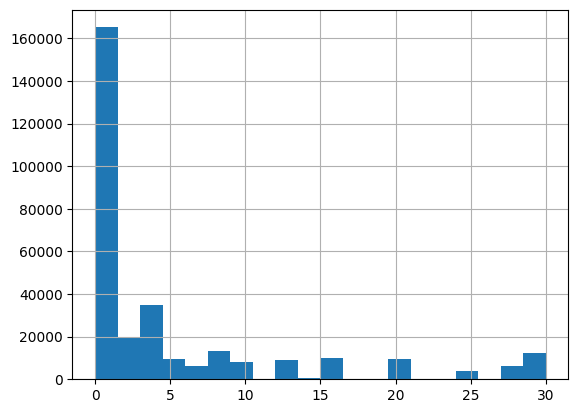

In [22]:
#We will explore the remaining columns for further processing, though the data doesn't say anything about few columns
#like alcohol, fruits vegetables but they give an indication on ones lifestyle, instead of dropping we will try to work further on it
#We will start with alcohol_consumption using Histogram
df['alcohol_consumption'].hist(bins=20)
plt.show()

In [23]:
#From the above we will see that most of the people consume alcohol between 0-5 units
df['alcohol_consumption'].value_counts().sort_values()

alcohol_consumption
19.0        11
11.0        41
23.0        65
13.0        76
17.0        78
26.0       126
22.0       152
18.0       196
21.0       197
27.0       205
9.0        239
29.0       309
14.0       486
24.0      1253
7.0       2572
25.0      2670
6.0       3518
16.0      3602
28.0      5935
15.0      6178
10.0      7881
12.0      8825
20.0      9372
5.0       9622
3.0      11479
30.0     11976
8.0      13438
2.0      19740
4.0      23367
1.0      24983
0.0     140262
Name: count, dtype: int64

In [24]:
print("Mean : {}".format(df['alcohol_consumption'].mean()))
print("Mode : {}".format(df['alcohol_consumption'].mode()))
print("Median : {}".format(df['alcohol_consumption'].median()))

Mean : 5.096365920467276
Mode : 0    0.0
Name: alcohol_consumption, dtype: float64
Median : 1.0


In [25]:
#We will now group the data into buckets based on the alcohol consumption, we wil create a new column called 'alcohol' with the grouped data
df['alcohol'] = "None"
df['alcohol'] = np.where( (df['alcohol_consumption'] == 0) & (df['alcohol'] == "None"),'N',df['alcohol'])
df['alcohol'] = np.where( (df['alcohol_consumption'] > 0 ) & (df['alcohol_consumption'] <= 5) & (df['alcohol'] == "None"),"S",df['alcohol'])
df['alcohol'] = np.where( (df['alcohol_consumption'] > 5 ) & (df['alcohol_consumption'] <= 10) & (df['alcohol'] == "None"),"M",df['alcohol'])
df['alcohol'] = np.where( (df['alcohol_consumption'] > 10 ) & (df['alcohol_consumption'] <= 20) & (df['alcohol'] == "None"),"L",df['alcohol'])
df['alcohol'] = np.where( (df['alcohol_consumption'] > 20 ) & (df['alcohol'] == "None"),"XL",df['alcohol'])

In [26]:
#The new alcohol column looks as follows:
df['alcohol'].value_counts()

alcohol
N     140262
S      89191
L      28865
M      27648
XL     22888
Name: count, dtype: int64

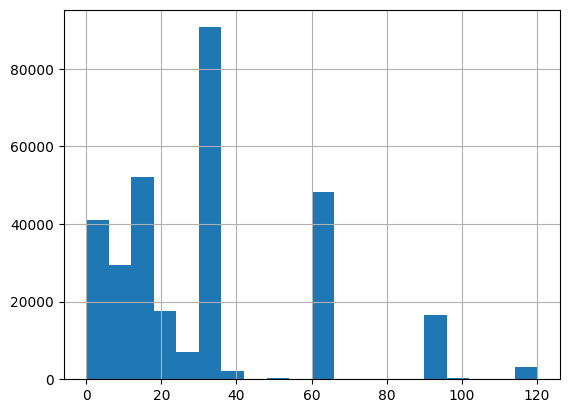

In [27]:
#We will now look for alcohol_consumption using Histogram
df['fruit_consumption'].hist(bins=20)
plt.show()

In [28]:
#From the above we will see that most of the people consume alcohol between 0-20 units
df['fruit_consumption'].value_counts().sort_values()

fruit_consumption
85.0         1
97.0         1
108.0        1
63.0         1
104.0        1
         ...  
20.0     17476
8.0      22279
12.0     30259
60.0     48127
30.0     90273
Name: count, Length: 77, dtype: int64

In [29]:
#We will now group the data into buckets based on the fruit consumption, we wil create a new column called 'fruits' with the grouped data
df['fruits'] = "None"
df['fruits'] = np.where( (df['fruit_consumption'] == 0) & (df['fruits'] == "None"),'N',df['fruits'])
df['fruits'] = np.where( (df['fruit_consumption'] > 0 ) & (df['fruit_consumption'] <= 20) & (df['fruits'] == "None"),"S",df['fruits'])
df['fruits'] = np.where( (df['fruit_consumption'] > 20 ) & (df['fruit_consumption'] <= 40) & (df['fruits'] == "None"),"M",df['fruits'])
df['fruits'] = np.where( (df['fruit_consumption'] > 40 ) & (df['fruit_consumption'] <= 80) & (df['fruits'] == "None"),"L",df['fruits'])
df['fruits'] = np.where( (df['fruit_consumption'] > 80 ) & (df['fruits'] == "None"),"XL",df['fruits'])

In [30]:
#The new fruits column looks as follows:
df['fruits'].value_counts()

fruits
S     131878
M      99938
L      48743
XL     19962
N       8333
Name: count, dtype: int64

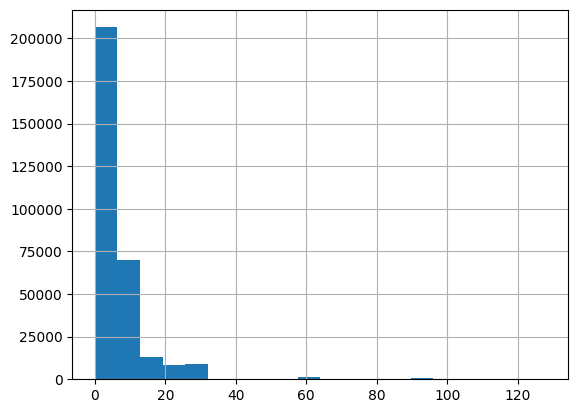

In [31]:
#We will now look for fried food using Histogram
df['friedpotato_consumption'].hist(bins=20)
plt.show()

In [32]:
#From the above we will see that most of the people dont eat fried food
df['friedpotato_consumption'].value_counts().sort_values()

friedpotato_consumption
97.0         1
37.0         1
124.0        1
46.0         1
72.0         1
         ...  
1.0      29876
2.0      36095
8.0      38366
0.0      44233
4.0      67833
Name: count, Length: 69, dtype: int64

In [33]:
#We will now group the data into buckets based on the fried food consumption, we wil create a new column called 'friedpotato' with the grouped data
#Post that we will drop column 'friedpotato_consumption'
df['friedpotato'] = "None"
df['friedpotato'] = np.where( (df['fruit_consumption'] == 0) & (df['friedpotato'] == "None"),'N',df['friedpotato'])
df['friedpotato'] = np.where( (df['fruit_consumption'] > 0 ) & (df['friedpotato_consumption'] <= 20) & (df['friedpotato'] == "None"),"S",df['friedpotato'])
df['friedpotato'] = np.where( (df['fruit_consumption'] > 20 ) & (df['friedpotato_consumption'] <= 40) & (df['friedpotato'] == "None"),"M",df['friedpotato'])
df['friedpotato'] = np.where( (df['fruit_consumption'] > 40 ) & (df['friedpotato_consumption'] <= 80) & (df['friedpotato'] == "None"),"L",df['friedpotato'])
df['friedpotato'] = np.where( (df['fruit_consumption'] > 80 ) & (df['friedpotato'] == "None"),"XL",df['friedpotato'])

In [34]:
#The new column looks as follows
df['friedpotato'].value_counts()

friedpotato
S       288747
N         8333
None      5676
M         5622
L          354
XL         122
Name: count, dtype: int64

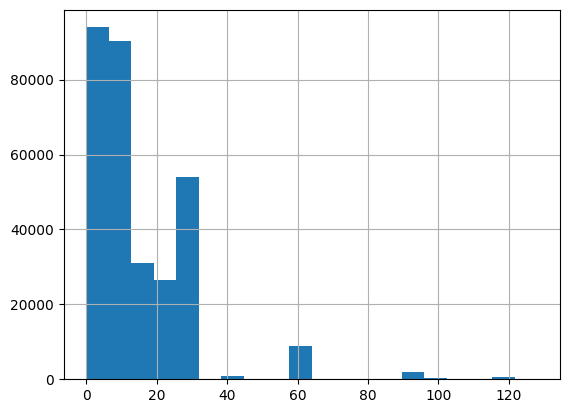

In [35]:
#Now we will work on green vegetables
df['green_vegetables_consumption'].hist(bins=20)
plt.show()

In [36]:
df['vegetables'] = "None"
df['vegetables'] = np.where( (df['green_vegetables_consumption'] == 0) & (df['vegetables'] == "None"),'N',df['vegetables'])
df['vegetables'] = np.where( (df['green_vegetables_consumption'] > 0 ) & (df['green_vegetables_consumption'] <= 20) & (df['vegetables'] == "None"),"S",df['vegetables'])
df['vegetables'] = np.where( (df['green_vegetables_consumption'] > 20 ) & (df['green_vegetables_consumption'] <= 40) & (df['vegetables'] == "None"),"M",df['vegetables'])
df['vegetables'] = np.where( (df['green_vegetables_consumption'] > 40 ) & (df['green_vegetables_consumption'] <= 80) & (df['vegetables'] == "None"),"L",df['vegetables'])
df['vegetables'] = np.where( (df['green_vegetables_consumption'] > 80 ) & (df['vegetables'] == "None"),"XL",df['vegetables'])

In [37]:
#The new column looks as follows:
df['vegetables'].value_counts()

vegetables
S     215146
M      60437
N      21389
L       9079
XL      2803
Name: count, dtype: int64

In [38]:
#We will now drop the columns as we have now grouped the data
df.drop(['alcohol_consumption','fruit_consumption','friedpotato_consumption','green_vegetables_consumption'], axis=1,inplace=True)

In [39]:
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol,fruits,friedpotato,vegetables
0,3,2,0,0,0,0,0,0,1,0,10,14.54,1,N,M,S,S
1,4,4,0,1,0,0,0,2,0,0,10,28.29,0,N,M,S,N
2,4,4,1,0,0,0,0,2,0,0,8,33.47,0,S,S,S,S
3,3,4,1,1,0,0,0,2,0,1,11,28.73,0,N,M,S,M
4,2,4,0,0,0,0,0,0,0,1,12,24.37,1,N,S,S,S


In [40]:
#We can now encode the newly created columns
df = encode(df,['alcohol','fruits','friedpotato','vegetables'])

In [41]:
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol,fruits,friedpotato,vegetables
0,3,2,0,0,0,0,0,0,1,0,10,14.54,1,2,1,4,3
1,4,4,0,1,0,0,0,2,0,0,10,28.29,0,2,1,4,2
2,4,4,1,0,0,0,0,2,0,0,8,33.47,0,3,3,4,3
3,3,4,1,1,0,0,0,2,0,1,11,28.73,0,2,1,4,1
4,2,4,0,0,0,0,0,0,0,1,12,24.37,1,2,3,4,3


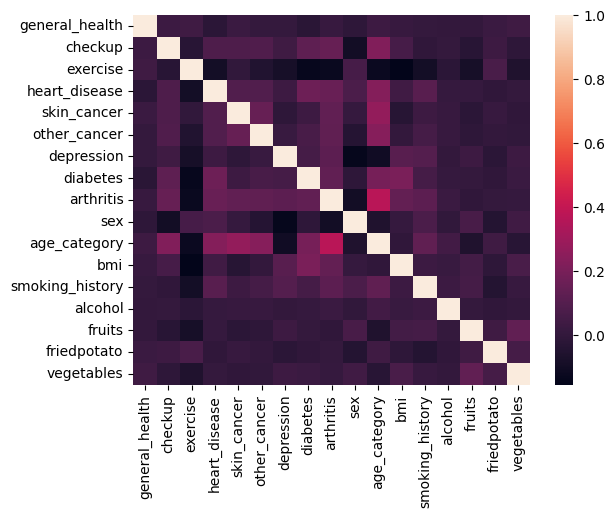

In [42]:
#We will see how the coorelation looks now post this step
sns.heatmap(df.corr())
plt.show()

In [43]:
#Extracting the features and target variables
X = df.drop(['heart_disease'], axis=1)
y = df['heart_disease']

In [44]:
X.head()

,general_health,checkup,exercise,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol,fruits,friedpotato,vegetables
0,3,2,0,0,0,0,0,1,0,10,14.54,1,2,1,4,3
1,4,4,0,0,0,0,2,0,0,10,28.29,0,2,1,4,2
2,4,4,1,0,0,0,2,0,0,8,33.47,0,3,3,4,3
3,3,4,1,0,0,0,2,0,1,11,28.73,0,2,1,4,1
4,2,4,0,0,0,0,0,0,1,12,24.37,1,2,3,4,3


In [45]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: heart_disease, dtype: int64

In [46]:
#We will train our data with few Models and check for few critial parameters
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('Ridge', RidgeClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [47]:
#We will split our data now for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [48]:
#Here the results are computed and stored in performance_table DataFrame, sorted by ROC AUC (descending order)
results = []
names = []
scoring = 'accuracy' 
for name, model in models:
    begin = start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results.append([name,train_time,predict_time,accuracy,precision,recall,f1,roc_auc,cv_results.mean()])
    end = time() - begin
    print("Done with model {} in {} seconds".format(name,end))
    print()
performance_table = pd.DataFrame(results, columns=["Classifier", "Training Time", "Prediction Time","Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC","Cross Val Score(Mean)"])
performance_table = performance_table.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)    

Done with model LR in 20.664324522018433 seconds



/home/upskill/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with model Ridge in 1.7846524715423584 seconds

Done with model Perceptron in 3.802910089492798 seconds

Done with model LDA in 7.769536733627319 seconds

Done with model QDA in 4.343152761459351 seconds

Done with model RF in 255.43133854866028 seconds

Done with model GB in 225.33903455734253 seconds

Done with model ExtraTrees in 248.73709893226624 seconds

Done with model Bagging in 75.73041820526123 seconds

Done with model AdaBoost in 65.61834955215454 seconds

Done with model MLP in 2104.360382080078 seconds



/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/

Done with model XGBoost in 75.69085192680359 seconds



In [49]:
#Showing the performance metrics
performance_table

,Classifier,Training Time,Prediction Time,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Score(Mean)
0,Perceptron,0.287107,0.007371,0.851807,0.258645,0.446336,0.327505,0.666904,0.852508
1,QDA,0.355769,0.038176,0.848359,0.231685,0.378054,0.287301,0.633890,0.848310
2,ExtraTrees,24.341322,2.012813,0.894627,0.237799,0.137565,0.174299,0.549391,0.896488
3,Bagging,7.170166,0.176414,0.907756,0.292941,0.099720,0.148790,0.539275,0.907885
4,RF,25.641463,1.559319,0.910039,0.305728,0.088706,0.137514,0.535494,0.910451
5,AdaBoost,6.560250,0.382296,0.918845,0.484897,0.061073,0.108483,0.527683,0.918934
6,XGBoost,7.558784,0.046801,0.918845,0.481625,0.049860,0.090365,0.522570,0.919003
7,GB,23.729902,0.098010,0.919299,0.510441,0.044053,0.081106,0.520168,0.919610
8,LDA,0.703141,0.010365,0.917307,0.396364,0.043652,0.078644,0.518902,0.917926
9,MLP,170.253747,0.198191,0.919121,0.495798,0.023628,0.045107,0.510757,0.919266


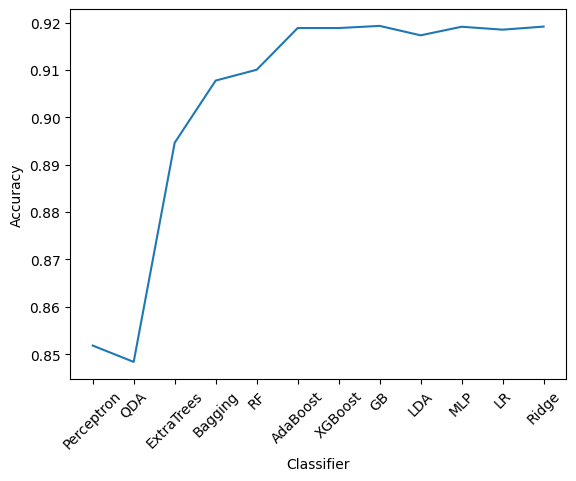

In [52]:
#We will draw a line plot to check for "Accuracy" of each model
sns.lineplot(x='Classifier',y='Accuracy', data=performance_table)
plt.xticks(rotation=45)
plt.show()


In [53]:
scores = []
for name, model in models:
    cv_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=10)
    for score in cv_scores:
        scores.append([name, score])

scores_df = pd.DataFrame(scores, columns=["Classifier", "Score"])

/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/upskill/.local/lib/

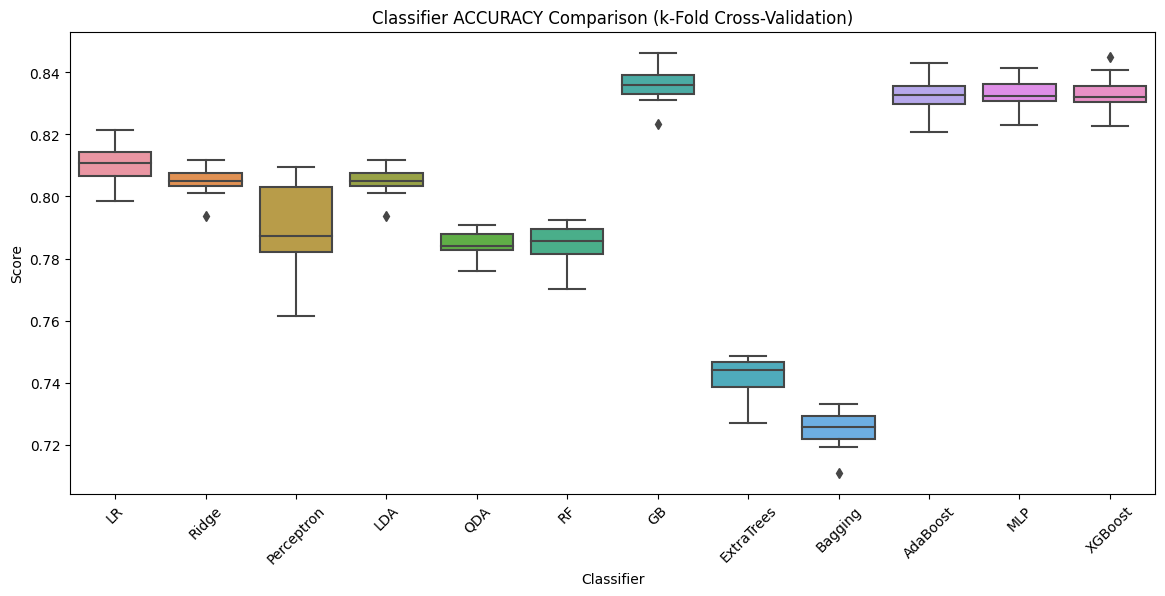

In [54]:
# Create a boxplot for the various models used in the example.
plt.figure(figsize=(14, 6))
sns.boxplot(x="Classifier", y="Score", data=scores_df)
plt.title(f"Classifier {scoring.upper()} Comparison (k-Fold Cross-Validation)")
plt.xticks(rotation=45)
plt.show()